Distribution de l'admin score en fonction du résultat de l'élection

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

# Step 1: Read the file content
with open('data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    content = file.read()

# Step 2: Split content into entries
entries = content.strip().split('\n\n')

# Step 3: Parse each entry
data = []
fields = ['SRC', 'TGT', 'VOT', 'RES', 'YEA', 'DAT', 'TXT']

for entry in entries:
    entry_data = {}
    lines = entry.strip().split('\n')
    for line in lines:
        match = re.match(r'([^:]+):(.*)', line)
        if match:
            key = match.group(1).strip()
            value = match.group(2).strip()
            if key in fields:
                entry_data[key] = value
        else:
            print(f"Line skipped: {line}")
    for field in fields:
        entry_data.setdefault(field, None)
    data.append(entry_data)

# Step 4: Create the DataFrame
df = pd.DataFrame(data)

# Step 5: Data Type Conversion
df['VOT'] = df['VOT'].astype(int)
df['RES'] = df['RES'].astype(int)
df['YEA'] = df['YEA'].astype(int)
df['DAT'] = pd.to_datetime(df['DAT'], format='%H:%M, %d %B %Y', errors='coerce')

# Step 7: Display the DataFrame
votes_df = df
votes_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [95]:
# Load the user data
user_df = pd.read_csv('data/all_features_dataframe.csv')

# Display the first few rows
user_df.head()

,username,total_score,categ1,categ2,categ3,categ4,articles1,articles2,articles3,articles4,articles5,articles6,articles7,articles8,articles9,articles10
0,!---slappdash---!,394.0,Entertainment,Music,Business,Sports,"['Rupture (band)', 30]","['The Cobra Group', 22]","['Trasharama A-Go-Go', 19]","['Blood Duster', 12]","['Propagandhi', 3]","['Australian hardcore', 3]","['Brutal Truth', 2]","['Dropdead', 1]","['Wacken Open Air', 1]","['Pyramid scheme', 1]"
1,%D0%90,665.0,Education,Film,Geography,Media,['List of Sundance Film Festival award winners...,['List of films at the 2008 Sundance Film Fest...,"['Weber State University', 18]","['Ogden, Utah', 17]","['2008 Sundance Film Festival', 14]","['List of MyNetworkTV affiliates', 13]","['KTVX', 12]",['List of films at the 2007 Sundance Film Fest...,['List of ABC television affiliates (by U.S. s...,"['2006 Sundance Film Festival', 11]"
2,'sed,195.0,Animation,Comedy,Media,Television,"['The Mansion Family', 1]","['Bloody Mary (South Park)', 1]","['Cartoon Wars Part I', 1]","['Cartoon Wars Part II', 1]","[""The Eight I'd Really Rather You Didn'ts"", 1]",NaN,NaN,NaN,NaN,NaN
3,(.Y.),131.0,Music,Lists,People,Sports,"['Slayer', 2]","['List of drummers', 1]","['List of bass guitarists', 1]","['Videogroove', 1]","['Blue Water High', 1]",NaN,NaN,NaN,NaN,NaN
4,(:Julien:),592.0,NaN,NaN,NaN,NaN,"['2012 FIBA Europe Under-18 Championship', 11]","['2013 FIBA Europe Under-20 Championship', 9]",['Party of Communists of the Republic of Moldo...,['List of names of European cities in differen...,"['2011 FIBA Europe Under-16 Championship', 6]",['List of twin towns and sister cities in Asia...,"['Roch Marc Christian Kaboré', 5]","['Zeev Sternhell', 5]","['Third Zimmerwald Conference', 4]","['Nikolay Zabolotsky', 4]"


In [97]:
# List of indices to drop (one from each duplicate pair)
indices_to_drop = [1187, 1639, 7570]

# Drop the rows from user_df
user_df = user_df.drop(index=indices_to_drop)

# Optional: Reset the index if you want a clean sequential index
user_df.reset_index(drop=True, inplace=True)

In [99]:
import pandas as pd

# On récupère les candidats uniques avec leur résultat
results_df = votes_df[['TGT', 'RES']].drop_duplicates(subset='TGT')

In [101]:
results_df.head()

,TGT,RES
0,BDD,1
137,Bilby,1
274,Darkwind,1
420,INeverCry,1
530,Jason Quinn,1


In [103]:
combined_df = pd.merge(results_df, user_df, left_on='TGT', right_on='username', how='left')
combined_df = combined_df.drop(columns=['username','categ1','categ2','categ3','categ4','articles1','articles2','articles3','articles4','articles5','articles6','articles7','articles8','articles9','articles10'])

In [105]:
combined_df.head()

,TGT,RES,total_score
0,BDD,1,1035.0
1,Bilby,1,1146.0
2,Darkwind,1,1205.0
3,INeverCry,1,952.0
4,Jason Quinn,1,NaN


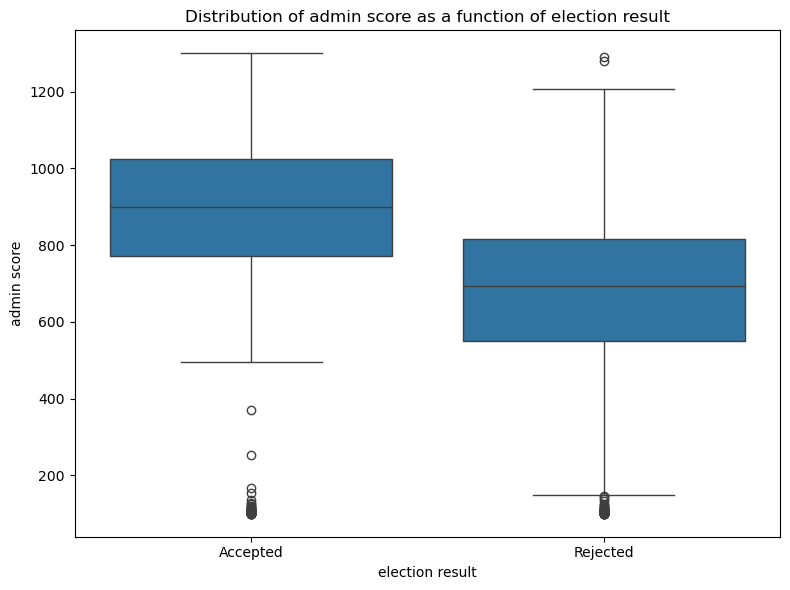

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined_df['status'] = combined_df['RES'].map({1: 'Accepted', -1: 'Rejected'})

# Création d'un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='total_score', data=combined_df)
plt.title("Distribution of admin score as a function of election result")
plt.xlabel("election result")
plt.ylabel("admin score")
plt.tight_layout()  #
plt.show()

/var/folders/fz/llm37_ps0jg8_f7jgrpnby200000gn/T/ipykernel_27500/1394126239.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_scores, shade=True, label='Accepted', color='green')
/var/folders/fz/llm37_ps0jg8_f7jgrpnby200000gn/T/ipykernel_27500/1394126239.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rejected_scores, shade=True, label='Rejected', color='red')


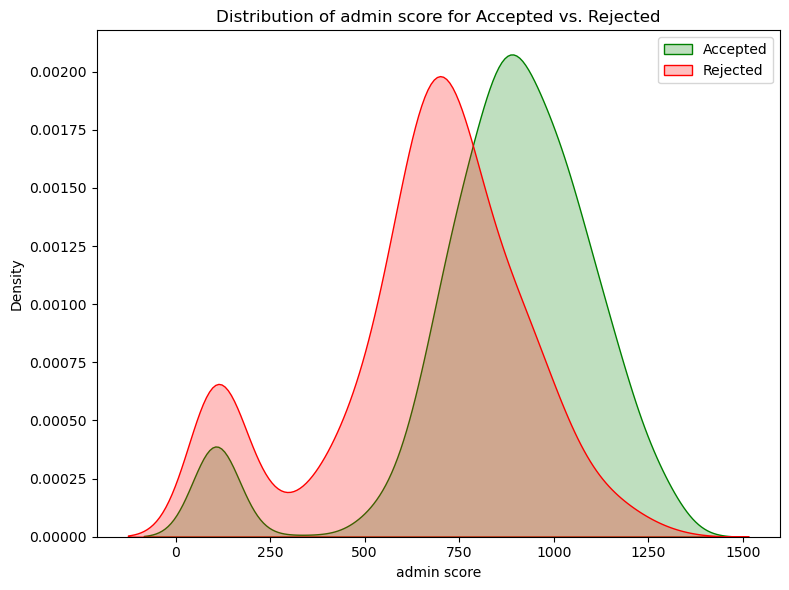

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accepted_scores = combined_df[combined_df['status'] == 'Accepted']['total_score']
rejected_scores = combined_df[combined_df['status'] == 'Rejected']['total_score']

plt.figure(figsize=(8, 6))

sns.kdeplot(accepted_scores, shade=True, label='Accepted', color='green')

sns.kdeplot(rejected_scores, shade=True, label='Rejected', color='red')

plt.title("Distribution of admin score for Accepted vs. Rejected")
plt.xlabel("admin score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

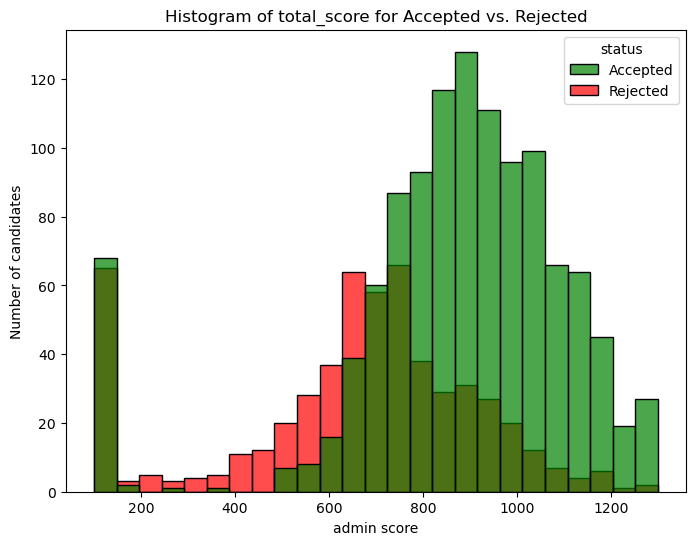

In [121]:
plt.figure(figsize=(8,6))
sns.histplot(data=combined_df, x='total_score', hue='status', kde=False, alpha=0.7, palette=['green', 'red'])
plt.title("Histogram of total_score for Accepted vs. Rejected")
plt.xlabel("admin score")
plt.ylabel("Number of candidates")
plt.show()

Combien de gens acceptés et refusés chaque année 

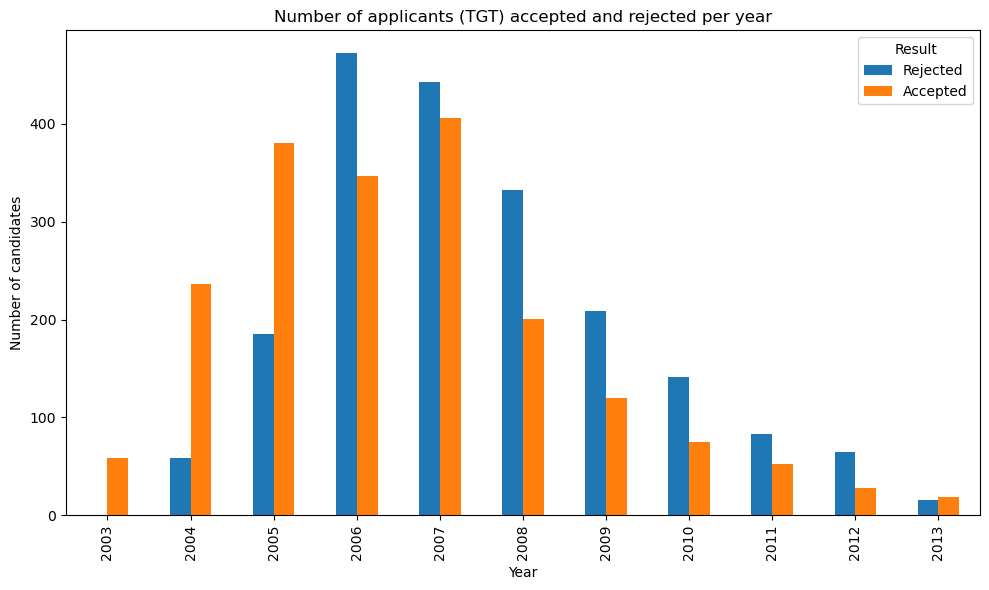

In [123]:
import pandas as pd
import matplotlib.pyplot as plt


resultats_annee = votes_df.groupby(['YEA', 'RES'])['TGT'].nunique().reset_index(name='counts')

resultats_pivot = resultats_annee.pivot(index='YEA', columns='RES', values='counts').fillna(0)

resultats_pivot.rename(columns={-1: 'Rejected', 1: 'Accepted'}, inplace=True)

# Création du graphique en barres
ax = resultats_pivot.plot(kind='bar', figsize=(10, 6))

# Ajustements du graphique
plt.title("Number of applicants (TGT) accepted and rejected per year")
plt.xlabel("Year")
plt.ylabel("Number of candidates")
plt.legend(title="Result")

plt.tight_layout()
plt.show()